# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

In [293]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

from scipy.special import gamma

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** В задаче 2.1 книги мы доказали, что несмещены $\frac{n+1}{n}X_{(n)}, 2\overline{X}$. $E[\frac{n+1}{n}X_{(n)}] = \frac{n+1}{n}\frac{n}{n+1}\theta = \theta;$ $E[2\overline{X}]=\frac{2}{2}\theta=\theta$   Имеем $E[X_{(n)}] = \frac{n}{n+1}\theta \neq \theta;  \lim\limits_{n\rightarrow +\inf} \frac{n}{n+1}\theta = \theta\rightarrow$ она смещена (асимптотически - несмещена)

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [167]:
def estimate_nth(X):
    return X.max()

def estimate_nth_corr(X):
    n = X.size
    return (n + 1.) / (n) * X.max()

def estimate_double_mean(X):
    return 2. * X.mean()

In [168]:
estimators = (
    (estimate_nth, "$X_{(n)}$", "red", 0.0),
    (estimate_nth_corr, "$\\frac{n+1}{n}X_{(n)}$", "green", 0.1),
    (estimate_double_mean, "$2\\overline{X}$", "blue", 0.2)
)

n_list = (10, 100, 500)
J = 500

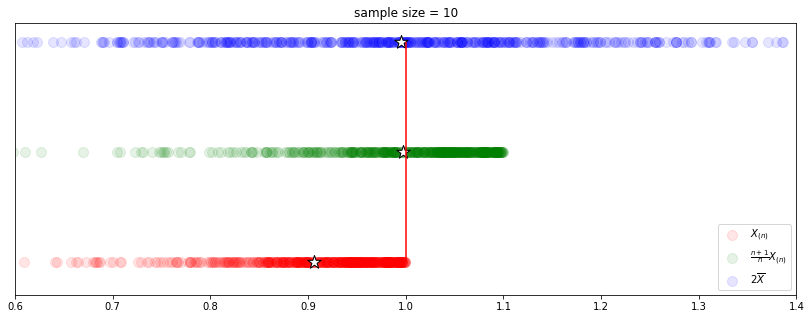

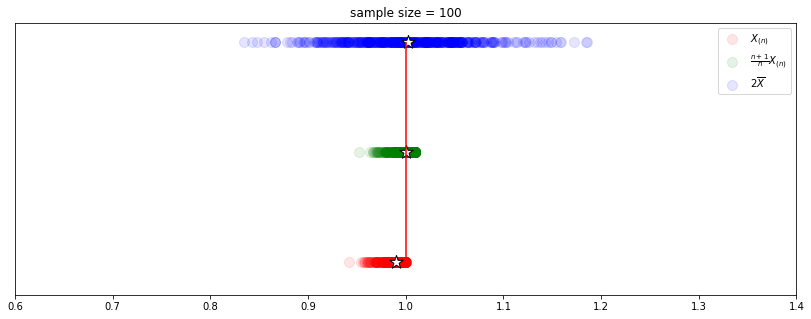

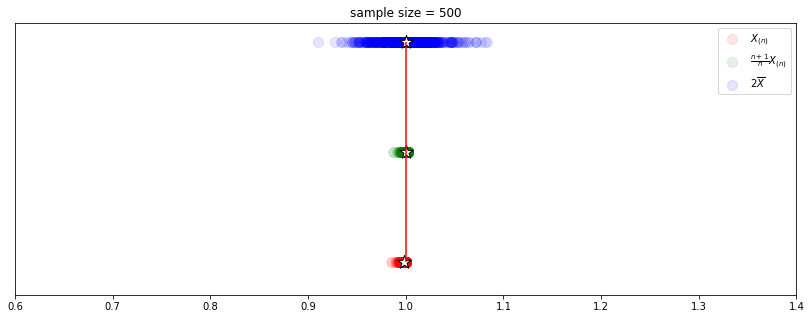

In [169]:
def est_plot(n_list, J, rvs, loc, scale, estimators):  
    for n in n_list:
        X = rvs(size=(J, n), loc=loc, scale=scale)
        plt.figure(figsize=(14,5))
        for estimator, name, color, level in estimators:
            E = np.array([estimator(Xn) for Xn in X])

            plt.scatter(E, np.zeros_like(E) + level, alpha=0.1,
                        s=100, color=color, label=name)
            plt.scatter(E.mean(), level, marker='*', s=200,
                        color='w', edgecolors='black')

        plt.vlines(1, estimators[0][-1], estimators[-1][-1], color='r')
        plt.title('sample size = %d' % n)
        plt.yticks([])
        plt.legend()
        plt.xlim((0.6, 1.4)) # todo: should i use this?
        plt.show()

est_plot(n_list, J, sps.uniform.rvs, loc=0., scale=1., estimators=estimators)

# Для каждой оценки:
#plt.scatter(оценка, np.zeros_like(оценка) + уровень, 
#            alpha=0.1, s=100, color=цвет, label=метка)
#plt.scatter(оценка.mean(), уровень, marker='*', s=200, 
#            color='w', edgecolors='black')

#Для всего графика:
#plt.vlines(1, от, до, color='r')
#plt.title('sample size = %d' % размер выборки)
#plt.yticks([])
#plt.legend()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** Мы уже рассматривали эту задачу:  2.4 из книги
$S^2 = \overline{X^2} - (\overline{X})^2$

$E[S^2] = E[\overline{X^2}] - E[(\overline{X})^2]$ 
= $\frac{1}{n}E[\sum\limits_{i=1}^{n}X_i^2] - \frac{1}{n^2}E[\sum\limits_{i=1}^{n} X_i^2] - \frac{1}{n}\sum\limits_{(i,j) = (1,1), i \neq j}^{(n,n)} E[X_i X_j]$ 
= $\frac{n-1}{n}E[X^2] - \frac{n-1}{n}(E[X])^2$
= $\frac{n-1}{n}D[X]$

$\Rightarrow$ $S^2$ - смещённая оценка (асимптотически - несмещённая), $\frac{n}{n-1}S^2$ - несмещённая оценка $\sigma^2$, её также называют исправленной выборочной дисперсией. 

Для данной модели выполните те же действия, что и с предыдущей.

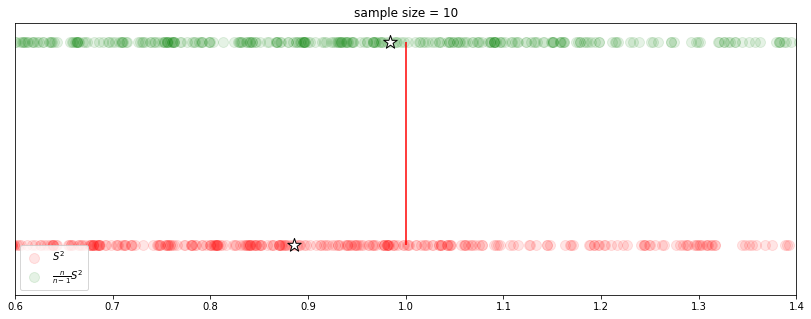

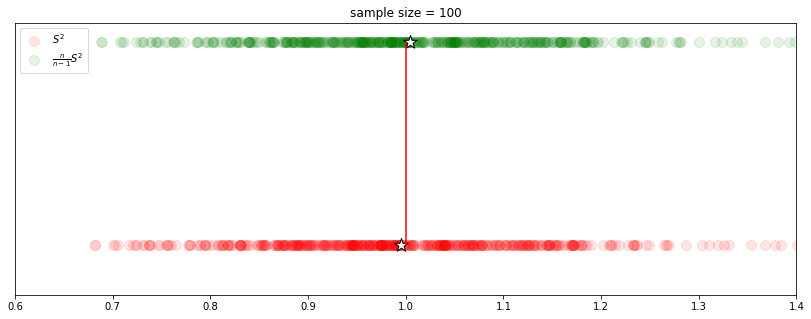

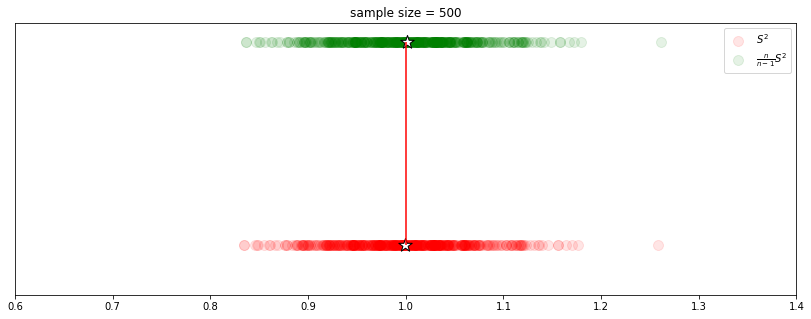

In [170]:
def estimate_s2(X):
    return (X * X).mean() - (X.mean())**2

def estimate_s2_corr(X):
    n = X.size
    return estimate_s2(X) * (n) / (n - 1.)

estimators = (
    (estimate_s2, "$S^2$", "red", 0.0),
    (estimate_s2_corr, "$\\frac{n}{n-1}S^2$", "green", 0.1)
)

est_plot(n_list, J, sps.norm.rvs, loc=0., scale=1., estimators=estimators)
# doesn't stated what scale we should use

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** несмещённость - свойство оценки в среднем (матожидание) быть равной параметру, который она оценивает. 
Проведённые эксперименты подтверждают свойства несмещённости и асимптотической несмещённости оценок выше.

В лабораторных работах скорректированные оценки используют, т.к. число опытов существенно ограничено, значит, n нельзя считать достаточно большим и требуется использовать скорректированные - несмещенные оценки, которые дают лучший результат при малом числе экспериментов.

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

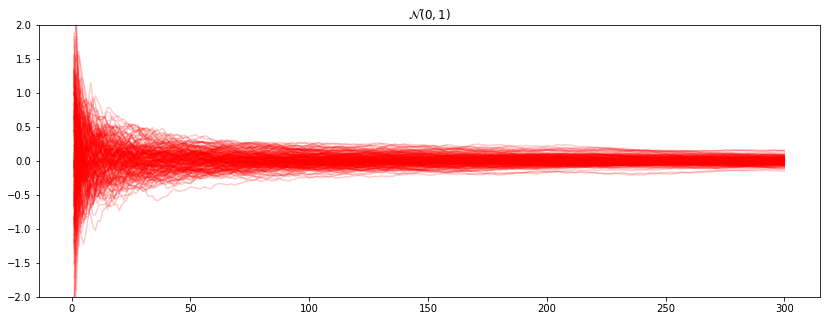

In [174]:
J = 200
n = 300
X = sps.norm.rvs(size=(J,n), loc=0., scale=1.)
ES = X[:]
ES = ES.cumsum(axis=1) / np.arange(1, ES.shape[1] + 1)

# SELF-CHECK (TODO REMOVE THIS)
# Z = [[(X[i][0:j]).mean() for j in range(1, X.shape[1] + 1)] for i in range(X.shape[0])]
# Z = np.array(Z)
# print("ES - Z = ", ES - Z) # should be zeroes
# END SELF-CHECK 

plt.figure(figsize = (14, 5))
plt.ylim((-2,2))
for E in ES:
    plt.plot(np.arange(1, E.size + 1), E, alpha=0.2, color="red")

plt.title("$\\mathcal{N}(0,1)$")
plt.show()

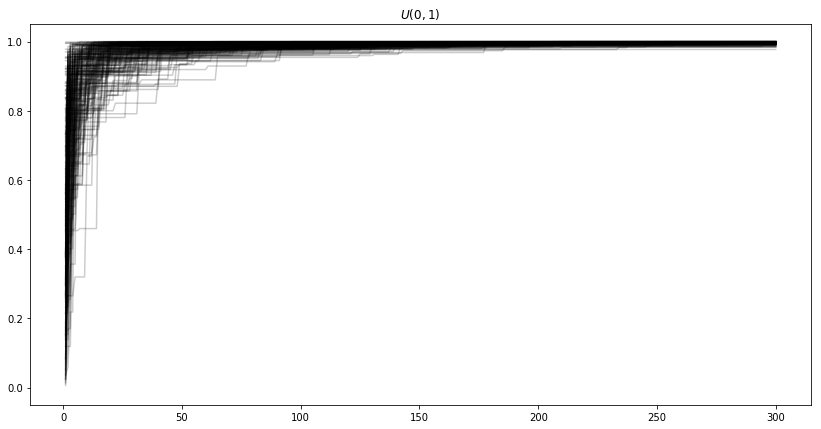

In [175]:
J = 200
n = 300
X = sps.uniform.rvs(size=(J,n), loc=0., scale=1.)
ES = X[:]
ES = np.maximum.accumulate(ES, axis=1)

# SELF-CHECK (TODO REMOVE THIS)
# Z = [[(X[i][0:j]).max() for j in range(1, X.shape[1] + 1)] for i in range(X.shape[0])]
# Z = np.array(Z)
# print("ES - Z = ", ES - Z) # should be zeroes
# END SELF-CHECK 

plt.figure(figsize = (14, 7))
plt.ylim((-0.05, 1.05))
for E in ES:
    plt.plot(np.arange(1, E.size + 1), E, alpha=0.2, color="black")

plt.title("$U(0,1)$")
plt.show()

**Вывод:** Состоятельность и сильная состоятельность - свойство оценок стремится
к оцениваемому параметру при увеличении размера выборки. Проведённый эксперименты подтверждают сделанные предположения. (особенно, если сделать n больше)

В первом пункте состоятельность следует из ЗБЧ.

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

In [176]:
def Tn_prep(n, J, X, mean):
    ES = X[:]
    ES = ES.cumsum(axis=1) / np.arange(1, ES.shape[1] + 1)

    Tn = np.tile(np.arange(1, n + 1), (J, 1))
    Tn = np.sqrt(Tn) * (ES - mean)

    # SELF-CHECK (TODO REMOVE THIS)
    # Z = [[math.sqrt(j) * ((X[i][0:j]).mean() - mean) for j in range(1, X.shape[1] + 1)] for i in range(X.shape[0])]
    # Z = np.array(Z)
    # print("Tn - Z = ", Tn - Z) # should be zeroes
    # END SELF-CHECK 
    
    return Tn

def plot1(n, J, Tn):
    plt.figure(figsize=(14,5))
    plt.title("$T_{j} (n)$")
    for T in Tn:
        plt.plot(np.arange(1, T.size + 1), T, alpha=0.2, color="black")
    plt.show()
 

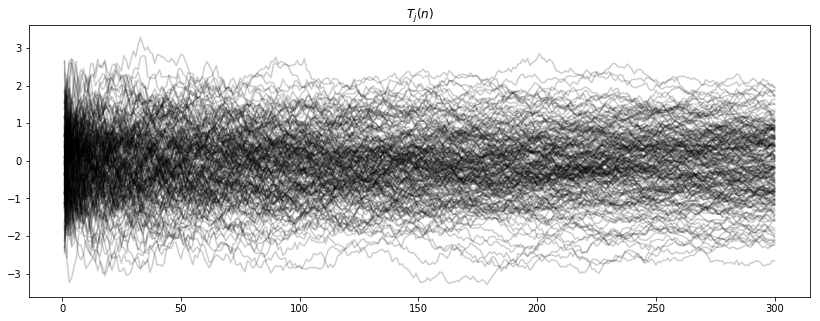

In [177]:
J = 200
n = 300
Tn = Tn_prep(n=n, J=J, X=sps.norm.rvs(size=(J,n), loc=0., scale=1.), mean=0.)

plot1(n, J, Tn)

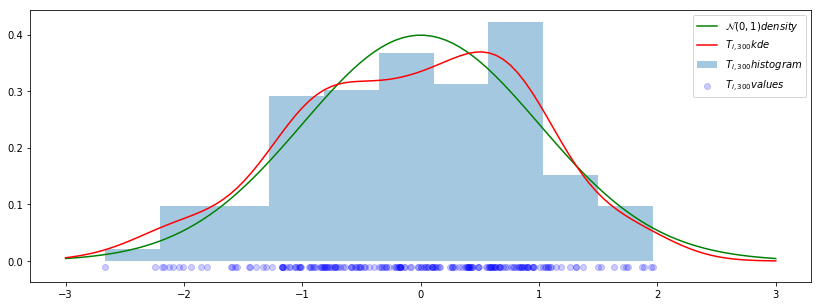

In [178]:
def plot2(J, X):
    dens = KDEUnivariate(X)
    dens.fit()
    grid = np.linspace(-3, +3, 100)
    plt.figure(figsize=(14,5))
    plt.plot(grid, sps.norm.pdf(grid, loc=0., scale=1.), color="green", label="$\\mathcal{N}(0,1) density $")
    plt.plot(grid, dens.evaluate(grid), color="red", label="$T_{i, 300} kde$")
    plt.hist(X, bins=10, normed=True, alpha=0.4, label="$T_{i, 300} histogram$")
    plt.scatter(X, np.ones(J) * -0.01, alpha=0.2, color="blue", label="$T_{i, 300} values$")
    plt.legend()
    plt.show()
    
plot2(J, Tn[:,-1])

Вторая часть (б) для Pois:

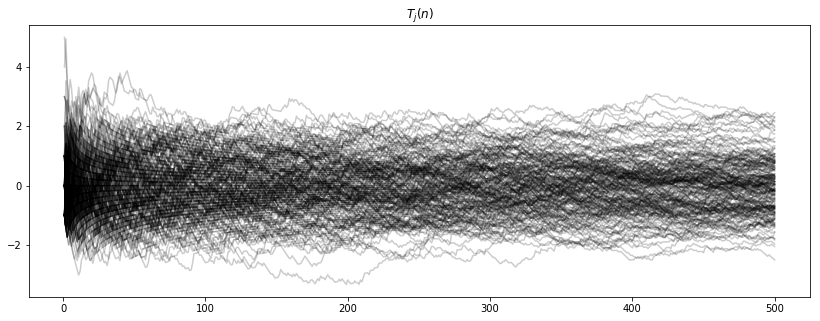

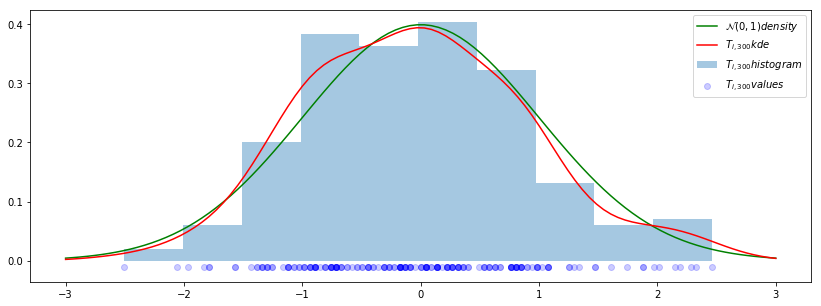

In [179]:
J = 200
n = 500
Tn = Tn_prep(n=n, J=J, X=sps.poisson.rvs(size=(J,n), mu=1.), mean=1.)

plot1(n, J, Tn)
plot2(J, Tn[:,-1])

**Вывод:**
(Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?)

Свойство ассимптотической нормальности - свойство оценки $\theta^*$, при котором $\sqrt{n} \left( \theta_{jn}^* - \theta \right)$ распределено нормально с некоторой дисперсией (для примеров выше - с дисперсией 1, как видно из графиков). Это полезно, т.к. основная масса значений (~99.7%) нормальной величины лежит в $[-3\sigma, +3\sigma]$, что означает, что такая оценка очень хорошо приближает $\theta$  при большом $n$ (корень в определении) и малой асимптотической дисперсии.

Сделанный эксперименты подтверждают сделанные предположения, ЦПТ помогает доказывать асимптотическую нормальность.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

In [180]:
n = 300
J = 200
theta = 1.

X = sps.uniform.rvs(size=(J, n), loc=0., scale=theta)
ES = X[:]
ES = np.maximum.accumulate(ES, axis=1)

Tn = np.tile(np.arange(1, n + 1), (J, 1))
Tn = Tn * (theta - ES) # n(\theta - X_{(n)})

# SELF-CHECK (TODO REMOVE THIS)
# Z = [[j * (theta - (X[i][0:j]).max()) for j in range(1, X.shape[1] + 1)] for i in range(X.shape[0])]
# Z = np.array(Z)
# print("Tn - Z = ", Tn - Z) # should be zeroes
# END SELF-CHECK 

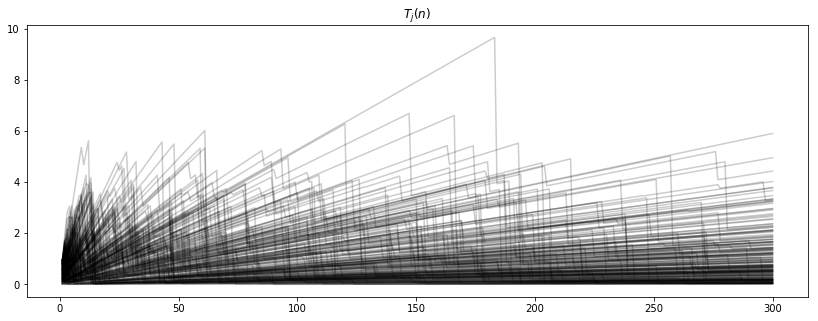

In [181]:
plt.figure(figsize=(14,5))
plt.title("$T_{j} (n)$")
for T in Tn:
    plt.plot(np.arange(1, T.size + 1), T, alpha=0.2, color="black")
plt.show()

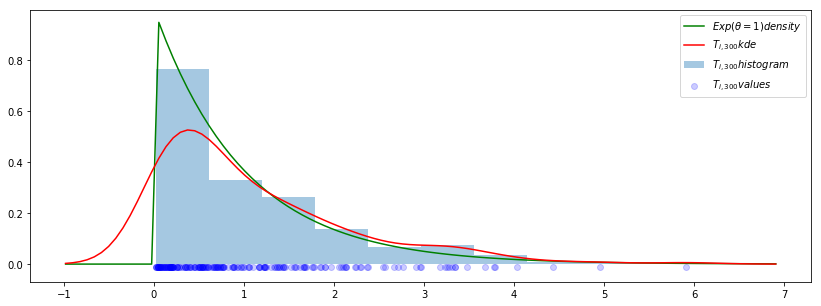

In [182]:
T300 = Tn[:,-1]
dens = KDEUnivariate(T300)
dens.fit()
grid = np.linspace(T300.min() - 1., T300.max() + 1., 100)
plt.figure(figsize=(14,5))
plt.plot(grid, sps.expon.pdf(grid, scale=1./theta), color="green", label="$Exp(\\theta=1) density $")
plt.plot(grid, dens.evaluate(grid), color="red", label="$T_{i, 300} kde$")
plt.hist(T300, bins=10, normed=True, alpha=0.4, label="$T_{i, 300} histogram$")
plt.scatter(T300, np.ones(J) * -0.01, alpha=0.2, color="blue", label="$T_{i, 300} values$")
plt.legend()
plt.show()

**Вывод:** Проведённый эксперимент подтверждает предположение (теоретическое) 
$n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

In [188]:
models = (
    (sps.norm(loc=grid, scale=1.).pdf, [[-1, 1], [-5, 5], [-1, 5]], "$\\mathcal{N}(\\theta, 1)$"),
    (sps.expon(scale=1./grid).pdf, [[1, 2], [0.1, 1], [1, 10]], "$Exp(\\theta)$"),
    (sps.uniform(loc=0., scale=grid).pdf, [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], "$U[0, \\theta]$"),
    (sps.binom(n=5., p=grid).pmf, [[0, 1], [5, 5], [0, 5]], "$Bin(5, \\theta)$"),
    (sps.poisson(mu=grid).pmf, [[0, 1], [0, 10], [5, 10]], "$Pois(\\theta)$"),
    (sps.cauchy(loc=grid).pdf, [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], "$Сauchy(\\theta)$")
)

Выполнить задание, не создавая много кода, поможет следующая функция.

In [189]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1) # TODO CHECK
        # likelihood = значение функции правдоподобия
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

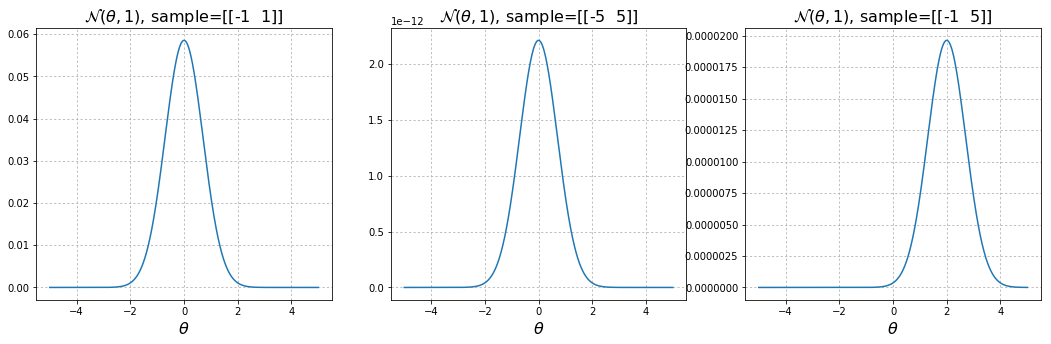

In [190]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

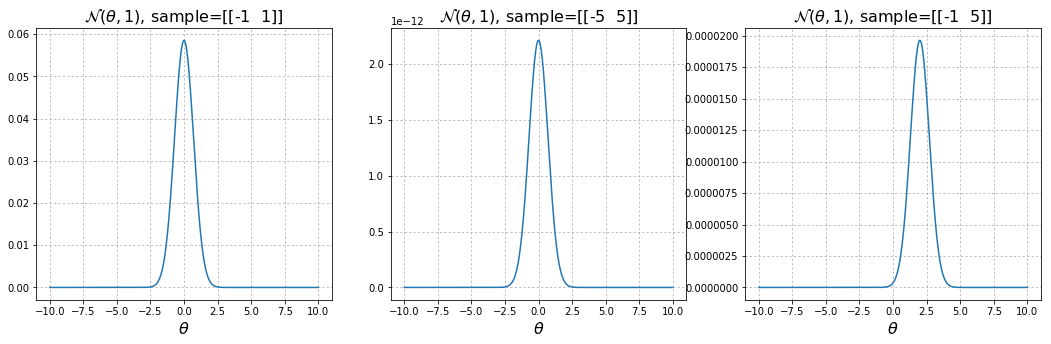

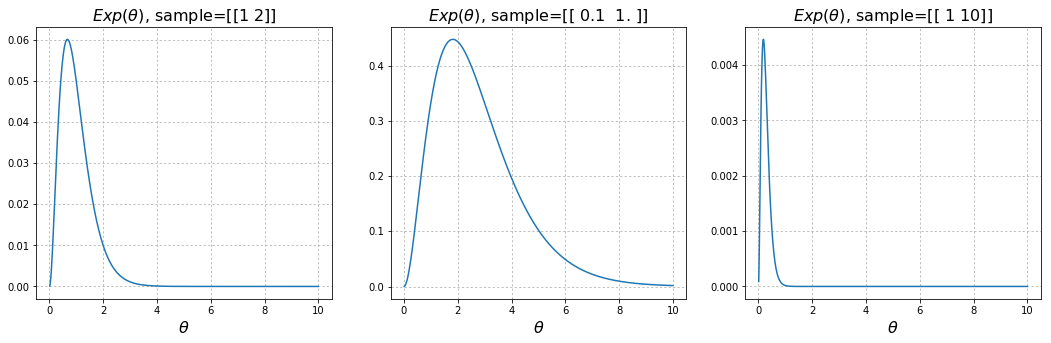

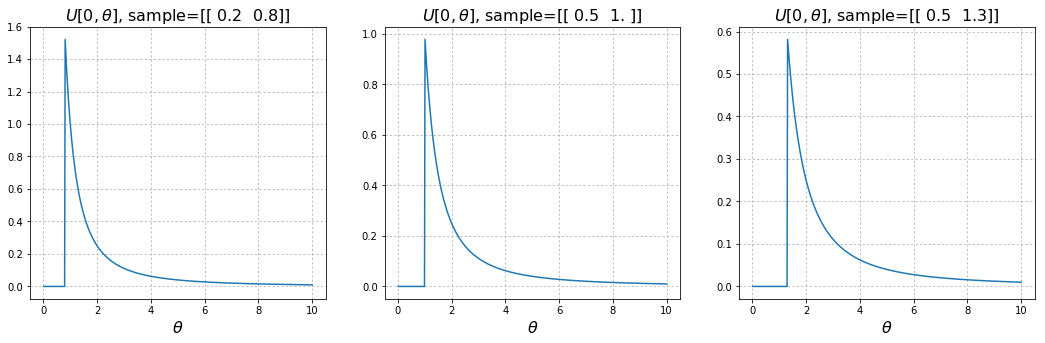

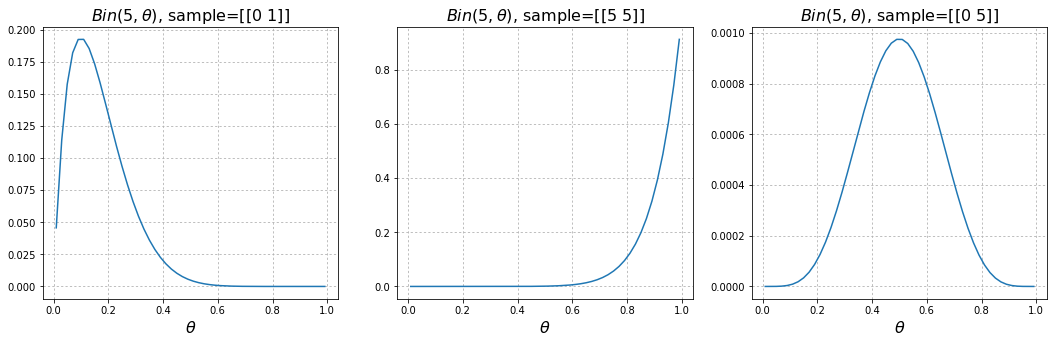

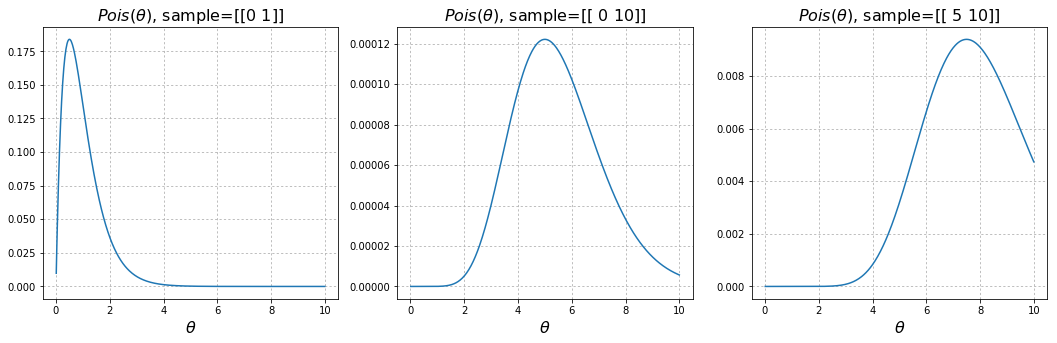

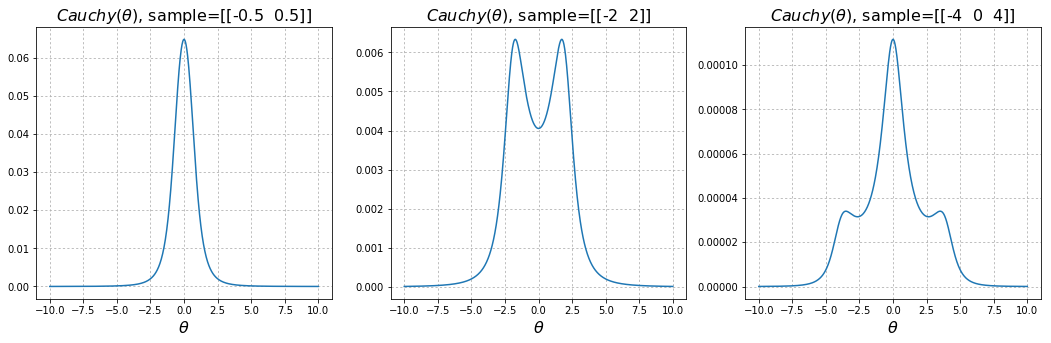

In [191]:
grid = np.linspace(-10, 10, 1000).reshape((-1, 1))
for pdf, samples, name in models:
    draw_likelihood(pdf, grid, samples, name)

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** Функция правдоподобия - показывает, насколько хороши все оценки при фиксированной выборке. Она есть функция от $\theta$, и интеграл от неё не всегда равен 1 -> она не всегда является плотностью. Графики функции правдоподобия таковы, что их значение тем больше, чем больше значение всех плотностей для этого значения параметра на заданной выборке. Иначе говоря, поэтому графики для N выглядя как "сложение-умножением" двух графиков плотности в для данных из выборки. (например, середина N для sample = [-1,5] находится (5 -1 = 2), а оцениваем мы именно смещение. Для графиков Cauchy (тоже оцениваем смещение) это тоже видно.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [192]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

Потому что значение нулевое. Используем логарифмическую функцию потерь.

In [495]:
likelihood = sps.norm.logpdf(sample).sum() 
print(likelihood)

-141755.164495


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

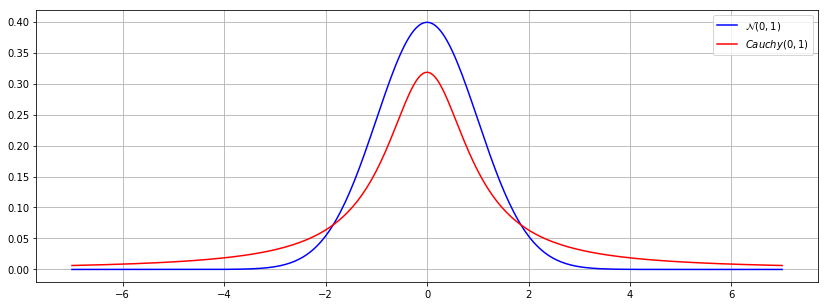

In [200]:
grid = np.linspace(-7, +7, 300)
plt.figure(figsize=(14, 5))
plt.plot(grid, sps.norm.pdf(grid), color="blue", label="$\\mathcal{N}(0, 1)$")
plt.plot(grid, sps.cauchy.pdf(grid), color="red", label="$Сauchy(0, 1)$")
plt.legend()
plt.grid()
plt.show()

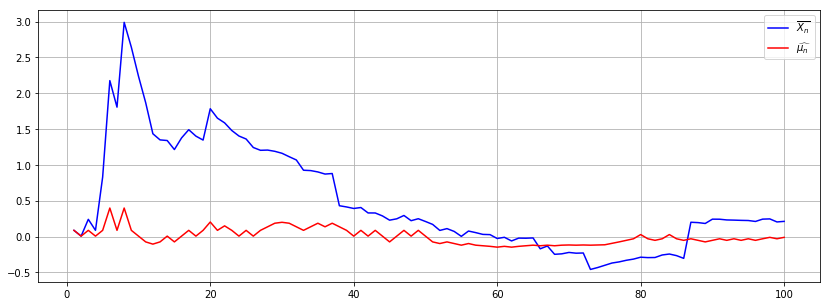

In [202]:
n = 100 
plt.figure(figsize=(14,5))
X = sps.cauchy.rvs(size=n)
ES = X.cumsum() / np.arange(1, X.size + 1)
EM = np.array([np.median(X[0:i]) for i in range(1, X.size + 1)])


plt.plot(np.arange(1, n + 1), ES, color="blue", label="$\overline{X_n}$")
plt.plot(np.arange(1, n + 1), EM, color="red", label="$\widehat{\mu_n}$")
plt.grid()
plt.legend()
plt.show()

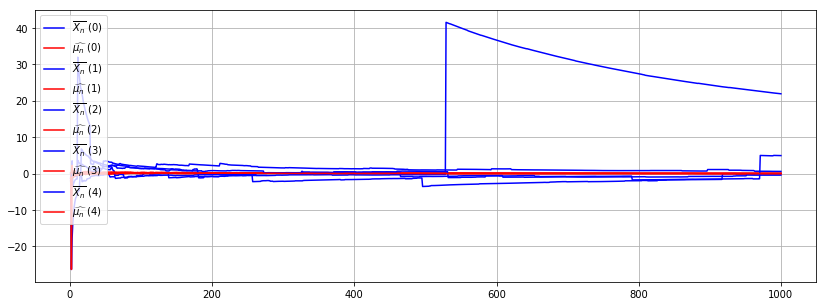

In [210]:
n = 1000
plt.figure(figsize=(14,5))
for i in range(5):
    X = sps.cauchy.rvs(size=n)
    ES = X.cumsum() / np.arange(1, X.size + 1)
    EM = np.array([np.median(X[0:i]) for i in range(1, X.size + 1)])


    plt.plot(np.arange(1, n + 1), ES, color="blue", label="$\overline{X_n}$ (%d)"%(i))
    plt.plot(np.arange(1, n + 1), EM, color="red", label="$\widehat{\mu_n}$ (%d)"%(i))
    plt.grid()
    plt.legend()
plt.show()

**Вывод**
Мы знаем, что $\widehat{\mu}$ - ассимптотически нормальная оценка $\theta=0$ для Cauchy. Из номера выше известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta=0$ для $\mathcal{N}(\theta, 1)$. Они имеют схожие плотности, но $\overline{X}$ является плохой оценкой для $\theta=0$ для Cauchy.

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [333]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

In [350]:
X = [2,1,2,3,3,4,2,5,1,2,1,1,2,4,1,1,1,2,1,3,4,2,3,3,4,4,5,3,4,3,4,1,2,3,2,1,6,1,1,4,4,4,2,2,1,3,2,4,5,2,4,4,3,4,5,3,2,3,4,1,3,4,4,3,3,1,4,4,1,3,2, (0.01) ,3,2,1,1,1,1,1,1,1,4,7,3,4,3,2,1,2,1,2,2, (0.01) ,1,1,4,2,2,1,1,3,2,2,1,3,4,6,3,1,1,5,2,4,6,6,6,3,4,3,4,4,2,4,6,5,3,6,2,3,2,3,3,3,3,2,3,3,3,5,4,3,3,2,3,2,4,]
X = np.array(X,dtype=float) # weather in Ufa, Russia (Nov 1 2016 - Mar 26 2017)
print(X.shape)

(146,)


$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$

In [372]:
step = 1.
EPS = 1e-7
k_fr, k_to =  EPS,  25.
l_fr, l_to =  EPS,  25.

debug = True
i = 0
while step > (0.5 * EPS):
    i += 1
    if (debug):
        print("Iteration : ", i) 
        print("k = ", (k_fr, k_to))
        print("l = ", (l_fr, l_to))
        print("step = ", step)
    grid = np.mgrid[k_fr:k_to:step, l_fr:l_to:step]
    k = np.array(grid[0], dtype=float)
    l = np.array(grid[1], dtype=float)
    k = k.reshape(k.size)
    l = l.reshape(l.size)

    likelihood = np.ones(k.size)
    for x in X:
        likelihood *= k * (x ** (k - 1.)) / (l ** k) * np.exp( - ((x / l) ** k))
        
    argmax = cool_argmax(likelihood)
    
    print(k[argmax], l[argmax])
    
    ce = (k_fr + k_to) / 2.
    l4 = (k_to - k_fr) / 4.
    # решает проблему, когда argmax по центру разреза
    # мы отрезаем 1/4 длины с того края, от которого 
    # argmax дальше, (если резать надвое - если вдруг argmax
    # будет по центру - можем срезать точку максимума)
    if (k[argmax] < ce):
        k_to -= l4
    else:
        k_fr += l4
        
    ce = (l_fr + l_to) / 2.
    l4 = (l_to - l_fr) / 4.
    if (l[argmax] < ce):
        l_to -= l4
    else:
        l_fr += l4
    
    step = step * 3. / 4.

K = (k_to + k_fr) / 2.
L = (l_to + l_fr) / 2.

Iteration :  1
k =  (1e-07, 25.0)
l =  (1e-07, 25.0)
step =  1.0
2.0000001 3.0000001
Iteration :  2
k =  (1e-07, 18.750000025)
l =  (1e-07, 18.750000025)
step =  0.75
2.2500001 3.0000001
Iteration :  3
k =  (1e-07, 14.06250004375)
l =  (1e-07, 14.06250004375)
step =  0.5625
1.6875001 2.8125001
Iteration :  4
k =  (1e-07, 10.5468750578125)
l =  (1e-07, 10.5468750578125)
step =  0.421875
1.6875001 2.9531251
Iteration :  5
k =  (1e-07, 7.910156318359375)
l =  (1e-07, 7.910156318359375)
step =  0.31640625
1.8984376 3.1640626
Iteration :  6
k =  (1e-07, 5.932617263769531)
l =  (1e-07, 5.932617263769531)
step =  0.2373046875
1.8984376 3.0849610375
Iteration :  7
k =  (1e-07, 4.449462972827148)
l =  (1.4831543909423828, 5.932617263769531)
step =  0.177978515625
1.95776377188 3.08496103157
Iteration :  8
k =  (1e-07, 3.337097254620361)
l =  (1.4831543909423828, 4.820251545562744)
step =  0.13348388671875
1.86877451406 3.08496103157
Iteration :  9
k =  (0.8342743886550903, 3.337097254620361)
l 

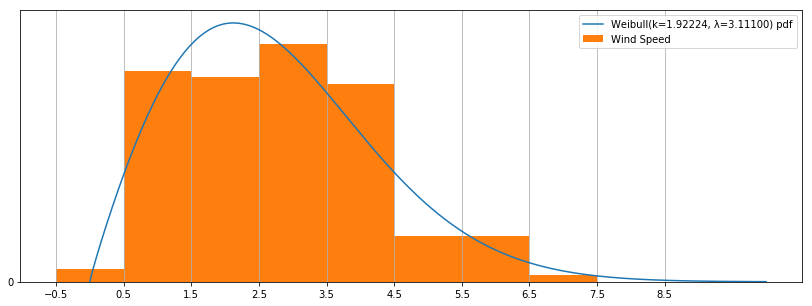

In [421]:
grid = np.linspace(0, 10, 300)

fig = plt.figure(figsize=(14, 5))
ax = fig.gca()
ax.set_xticks(np.arange(-0.5, 9.5, 1))
ax.set_yticks(np.arange(0, 10, 1))

plt.plot(grid, sps.weibull_min(c=K , scale=L ).pdf(grid), label="Weibull(k=%.5f, λ=%.5f) pdf"%(K,L))
plt.hist(X, range = (-0.5, 7.5), bins=8, normed=True, label="Wind Speed")
plt.grid()
plt.legend()
plt.show()

In [422]:
E = L * gamma(1. + 1./K)
print(E)

2.75960791956


**Вывод:** Строить ветряки в этом городе - плохая затея.

Построенные графики можно считать соответствующими теории, учитывая, что данные были округлены да целых значений, а их максимум не превышает 7. (Регион такой). Данные с википедии о среднемесячном значении ветра в 3,4(https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B8%D0%BC%D0%B0%D1%82_%D0%91%D0%B0%D1%88%D0%BA%D0%BE%D1%80%D1%82%D0%BE%D1%81%D1%82%D0%B0%D0%BD%D0%B0 - для области) и 2,4(http://www.atlas-yakutia.ru/weather/spravochnik/wdsp/climate_sprav-wdsp_2872201431.php - можно было написать письмо и получить данные, но это долго) в среднем (2,9) согласуются с результатом по Вейбуллу(2,8) с вычисленными параметрами с учётом дикой погрешности измерений и усреднением непонятно по чему.

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [253]:
# plt.show();
X3d = [];
thetas = np.arange(1., 201.) / 100.
for theta in thetas:
    Xs = sps.uniform(loc=0., scale=theta).rvs(size = (100,2000))

    Xs = Xs.T
    #plt.figure(figsize=(14, 5));
    #for i, X in enumerate(Xs):
    #    plt.scatter(X, np.ones(X.size) * i)
    #plt.show()
    X3d.append(Xs)
print(len(X3d), X3d[0].shape)

200 (2000, 100)


In [254]:
def estimate_mean2(Xs):
    return 2.* Xs.mean(axis=1)
    
def estimate_min_corr(Xs):
    return Xs.min(axis=1) * (n + 1)

def estimate_min_plus_max(Xs):
    return Xs.min(axis=1) + Xs.max(axis=1)

def estimate_max_corr(Xs):
    n = Xs.shape[1]
    return Xs.max(axis=1) * (n + 1) / (n)

mean2 = []
min_corr = []
min_plus_max = []
max_corr = []

for Xs in X3d:
    mean2.append(estimate_mean2(Xs))
    min_corr.append(estimate_min_corr(Xs))
    min_plus_max.append(estimate_min_plus_max(Xs))
    max_corr.append(estimate_max_corr(Xs))

mean2 = np.array(mean2)
min_corr = np.array(min_corr)
min_plus_max = np.array(min_plus_max)
max_corr = np.array(max_corr)
print(mean2.shape)

(200, 2000)


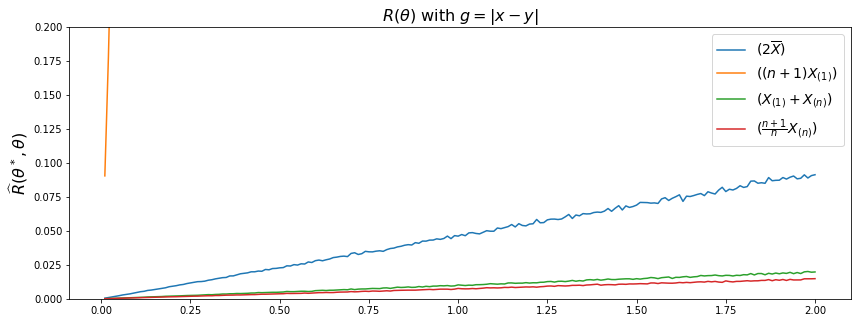

In [286]:
# g = |x - y|
def R1(X):
    Xplot = X - np.tile(thetas.T, (2000, 1)).T
    Xplot = np.abs(Xplot).mean(axis=1)
    return(Xplot)

plt.figure(figsize=(14,5))
plt.title("$R(\\theta)$ with $g = |x - y|$", fontsize=16)
plt.plot(thetas, R1(mean2), label="($2\\overline{X}$)")
plt.plot(thetas, R1(min_corr), label="($(n+1)X_{(1)}$)")
plt.plot(thetas, R1(min_plus_max), label="($X_{(1)}+X_{(n)}$)")
plt.plot(thetas, R1(max_corr), label="($\\frac{n+1}{n} X_{(n)}$)")
plt.ylim((0, 0.2))
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# plt.grid(ls=':')
# plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
# plt.legend(fontsize=14)
# plt.title(тип функции потерь, fontsize=16)

#$2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$.

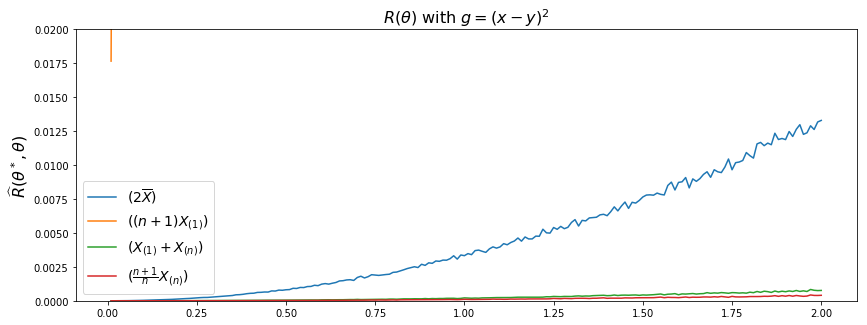

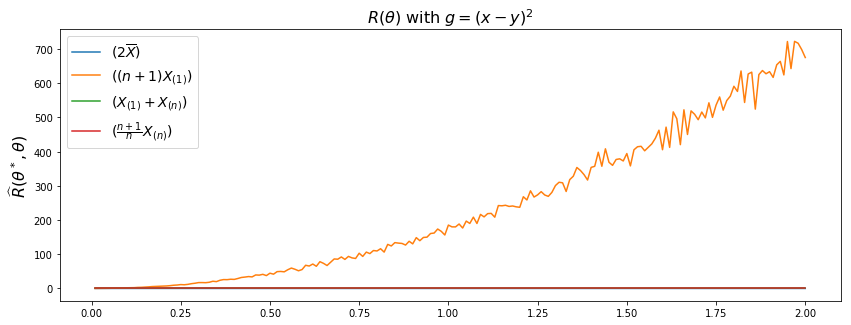

In [308]:
# g = (x - y)^2
def R2(X):
    Xplot = X - np.tile(thetas.T, (2000, 1)).T
    Xplot = (Xplot * Xplot).mean(axis=1)
    return(Xplot)
for ylim in ((0, 0.02), None):
    plt.figure(figsize=(14,5))
    plt.title("$R(\\theta)$ with $g = (x - y)^2$", fontsize=16)
    plt.plot(thetas, R2(mean2), label="($2\\overline{X}$)")
    plt.plot(thetas, R2(min_corr), label="($(n+1)X_{(1)}$)")
    plt.plot(thetas, R2(min_plus_max), label="($X_{(1)}+X_{(n)}$)")
    plt.plot(thetas, R2(max_corr), label="($\\frac{n+1}{n} X_{(n)}$)")
    plt.ylim(ylim)
    plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

# plt.grid(ls=':')
# plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
# plt.legend(fontsize=14)
# plt.title(тип функции потерь, fontsize=16)

#$2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$.

In [291]:
# plt.plot(тета, функция риска, label=latex-метка)
# plt.grid(ls=':')
# plt.xlabel('$\\theta$', fontsize=16)
# plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
# plt.legend(fontsize=14)
# plt.title(тип функции потерь, fontsize=16)
# plt.ylim((0, ограничение сверху))

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:**  $\frac{n+1}{n} X_{(n)}$  Является лучшей во всех подходах, т.к. её R минимальна из вариантов выше, что согласуется с результатами задачи 4.1 из книги

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

In [292]:
# plt.show();
X3d = [];
thetas = np.arange(1., 201.) / 100.
for theta in thetas:
    Xs = sps.expon(loc=0., scale=1./theta).rvs(size = (100,2000))

    Xs = Xs.T
    #plt.figure(figsize=(14, 5));
    #for i, X in enumerate(Xs):
    #    plt.scatter(X, np.ones(X.size) * i)
    #plt.show()
    X3d.append(Xs)
print(len(X3d), X3d[0].shape)

200 (2000, 100)


In [296]:
def estimate(Xs, k):
    meaned = (Xs**k).mean(axis=1)
    return (gamma(k + 1.) / meaned) ** (1. / k)

Es = [[], [], [], [], []]

for Xs in X3d:
    for k in range(1, 6):
        Es[k - 1].append(estimate(Xs, k))

Es = np.array(Es)
print(Es.shape)

(5, 200, 2000)


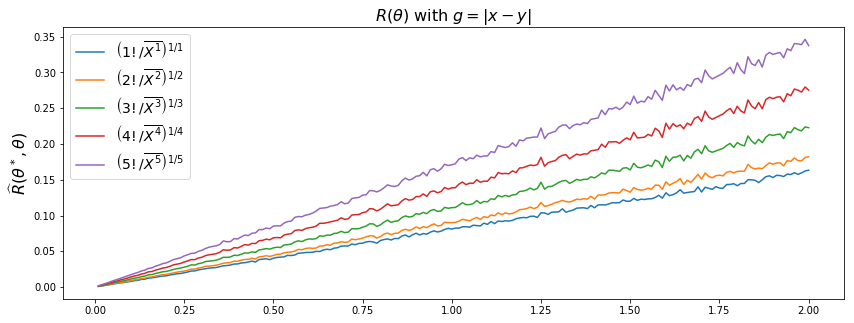

In [304]:
# g = |x - y|
def R1(X):
    Xplot = X - np.tile(thetas.T, (2000, 1)).T
    Xplot = np.abs(Xplot).mean(axis=1)
    return(Xplot)

plt.figure(figsize=(14,5))
plt.title("$R(\\theta)$ with $g = |x - y|$", fontsize=16)
for k in range(1, 6):
    plt.plot(thetas, R1(Es[k-1]), label="$\\left({%d}! / \\overline{X^{%d}}\\right)^{1/{%d}}$" % (k, k, k))
# plt.ylim((0, 0.2))
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# plt.grid(ls=':')
# plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
# plt.legend(fontsize=14)
# plt.title(тип функции потерь, fontsize=16)

#$2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$.

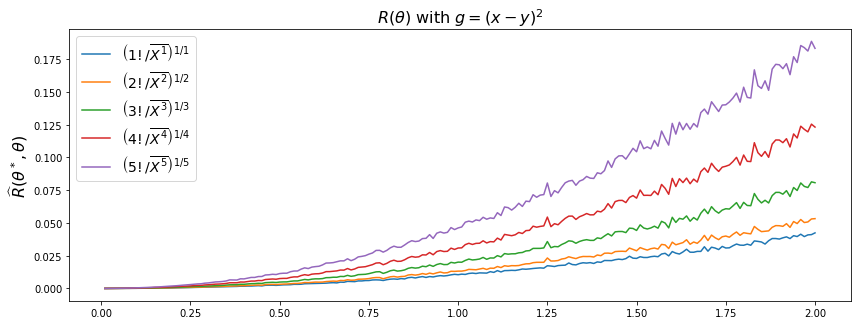

In [306]:
# g = (x - y)^2
def R2(X):
    Xplot = X - np.tile(thetas.T, (2000, 1)).T
    Xplot = (Xplot * Xplot).mean(axis=1)
    return(Xplot)

plt.figure(figsize=(14,5))
plt.title("$R(\\theta)$ with $g = (x - y)^2$", fontsize=16)
for k in range(1, 6):
    plt.plot(thetas, R2(Es[k-1]), label="$\\left({%d}! / \\overline{X^{%d}}\\right)^{1/{%d}}$" % (k, k, k))
# plt.ylim((0, 0.2))
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# plt.grid(ls=':')
# plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
# plt.legend(fontsize=14)
# plt.title(тип функции потерь, fontsize=16)

#$2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$.

**Вывод:** Из задачи 2.6 мы знаем,что $\forall n \in \mathcal{N} : \left(k! / \overline{X^k}\right)^{1/k}$ является ас. нормальной оценкой. Экспериментально теперь получаем, что для оценка с $k_1 < k_2$ лучше оценки с $k_2$

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta)$$

$$E_{\theta}[X_{(n)}] = \int\limits_{\mathcal{R}} x\frac{nx^{n-1}}{\theta^n}I(x\in[0,\theta])dx = \frac{n}{n+1}\theta$$
$$E_{\theta}[X_{(n)}^2] = \int\limits_{\mathcal{R}} x^2\frac{nx^{n-1}}{\theta^n}I(x\in[0,\theta])dx = \frac{n}{n+2}\theta^2$$

$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta$ = \mathsf{E}_{\theta}[cX_{(n)}] - \theta  = c\frac{n}{n+1}\theta - \theta  = \theta \frac{cn - n - 1}{n+1}$$


$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*. = c^2(E_{\theta}[X_{(n)}^2] - (E_{\theta}[X_{(n)}])^2) =  c^2(\frac{n}{n+2}\theta^2 - (\frac{n}{n+1}\theta)^2) = \frac{n c^2\theta^2}{(n + 1)^2 (n + 2)}$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

In [445]:
def cool_argmin(array):
    return np.unravel_index(np.argmin(array), array.shape)

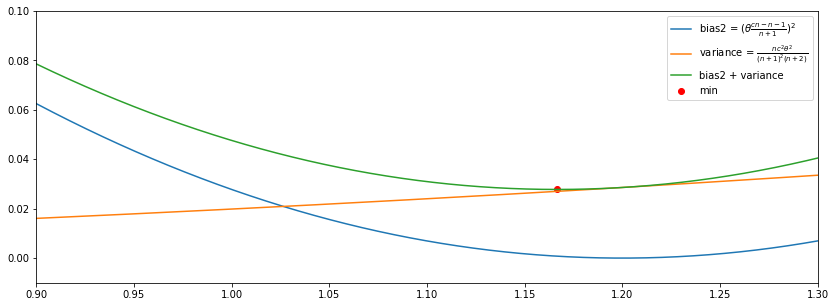

1.16667166672


In [452]:
n = 5.
t = 1.
grid = np.linspace(0, 2, 100000)
plt.figure(figsize=(14, 5))
bias2 = (t*(grid*n-n-1)/(n+1))**2
variance = n*grid*grid*t*t/((n+1)*(n+1)*(n+2))
plt.plot(grid, bias2, label="bias2 = $(\\theta \\frac{cn - n - 1}{n+1})^2$")
plt.plot(grid, variance,
         label="variance = $\\frac{n c^2\\theta^2}{(n + 1)^2 (n + 2)}$")
plt.plot(grid, bias2+ variance, label="bias2 + variance")
minarg = cool_argmin(bias2+ variance)
plt.scatter(np.ones(1)*grid[minarg],
            np.ones(1)*(bias2+ variance).min(), color="red", label="min")
plt.ylim((-0.01, 0.1))
plt.xlim((0.9, 1.3))
plt.legend()
plt.show()
print(grid[minarg])

$bias2(n=5,\theta=1) + variance(n=5,\theta=1)=\frac{15 c^2 - 35 c + 21}{21} $
Минимум этой функции достигается в c = 7/6 = 1.666(6)

** Вывод: ** Минимум достигается при $c = \frac{7}{6} \approx 1.16667166672$ $\Rightarrow$ оценка $7/6X_{(n)}$ даёт минимум риска. Она является смещенной. $$bias(\theta_c^*, \theta) = \mathsf{E}_{\theta} \theta_c^* - \theta \neq 0 $$ Несмещенной оценкой является $\frac{n+1}{n}X_{(n)}.$

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

$$\frac{c}{n}E_{\theta}\theta^* = E_{\theta}[\frac{c}{n}\frac{1}{c}\sum_{i=1}^{n}(X_{i} - \overline{X})^2] = E_{\theta}[S^2] = \frac{(n-1)\sigma^2}{n} \Rightarrow E_{\theta}[\theta^*] = \frac{n(n-1)\sigma^2}{cn} = \frac{(n-1)\sigma^2}{c}$$

$$\Rightarrow bias(\theta^*, \theta) = E_{\theta}\theta^* - \theta = \sigma^2(\frac{n(n-1)}{cn} - 1) = \frac{\sigma^2(n-1 - с)}{c}$$

$$D_{\theta}\frac{nS^2}{\sigma^2} = 2(n-1)$$

$$\Rightarrow D_{\theta}[S^2] = \frac{2(n-1)\sigma^4}{n^2}$$
$$\Rightarrow  variance(\theta^*, \theta) = D_{\theta}[\theta^*] = \frac{n^2D_{\theta}[S^2]}{c^2} = \frac{2(n-1)\sigma^4}{c^2}$$

$$\Rightarrow R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta)= $$
$$= (\sigma^2(\frac{n-1-с}{c}))^2+\frac{2(n-1)\sigma^4}{c^2} = \sigma^4((\frac{n-1}{c} - 1)^2+\frac{2(n-1)}{c^2})$$

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

6.0000036
11.0000016


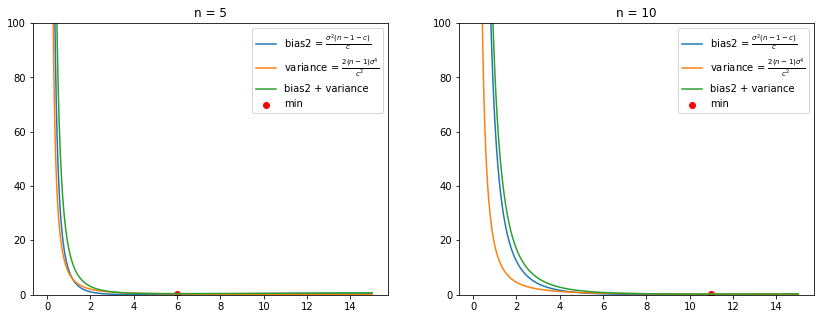

6.0000036
11.0000016


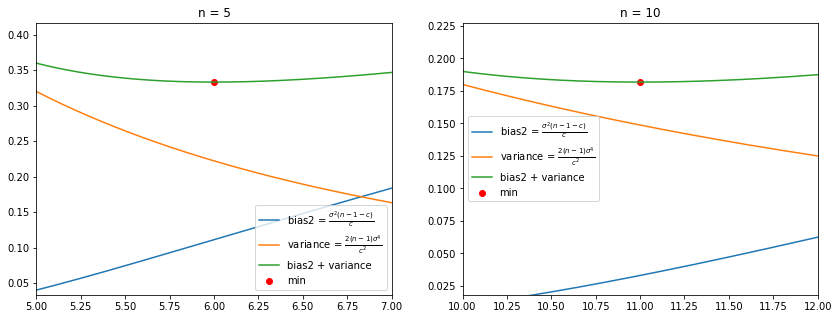

In [494]:
ns = (5, 10)
s2 = 1.

grid = np.linspace(0.1, 15, 1000000)
plt.figure(figsize=(14, 5))
for i, n in enumerate(ns):
    bias2 = (s2*(n-1-grid)/grid)**2
    variance = 2*(n-1)*(s2**2)/(grid**2)
   
    plt.subplot(1, 2, i+1)
    plt.title("n = " + str(n))
    plt.plot(grid, bias2, label="bias2 = $\\frac{\\sigma^2(n-1 - с)}{c}$")
    plt.plot(grid, variance, label="variance = $\\frac{2(n-1)\\sigma^4}{c^2}$")
    plt.plot(grid, bias2+ variance, label="bias2 + variance")
    minarg = cool_argmin(bias2+ variance)
    plt.scatter(np.ones(1)*grid[minarg], np.ones(1)*(bias2+ variance).min(), color="red", label="min")
    plt.ylim((-0.1, 100))
    #plt.xlim((0.9, 1.3))
    plt.legend()
    print(grid[minarg])
plt.show()
    
plt.figure(figsize=(14, 5))
for i, n in enumerate(ns):
    bias2 = (s2*(n-1-grid)/grid)**2
    variance = 2*(n-1)*(s2**2)/(grid**2)
    plt.subplot(1, 2, i+1)
    plt.title("n = " + str(n))
    plt.plot(grid, bias2, label="bias2 = $\\frac{\\sigma^2(n-1 - с)}{c}$")
    plt.plot(grid, variance, label="variance = $\\frac{2(n-1)\\sigma^4}{c^2}$")
    plt.plot(grid, bias2+ variance, label="bias2 + variance")
    minarg = cool_argmin(bias2+ variance)
    minval = bias2[minarg] + variance[minarg]
    plt.scatter(np.ones(1)*grid[minarg], np.ones(1)*(bias2+ variance).min(), color="red", label="min")
    plt.ylim((minval*0.1, minval*1.25))
    plt.xlim((grid[minarg] - 1, grid[minarg] + 1))
    plt.legend()
    print(grid[minarg])
plt.show()

**Вывод** Минимум достигается при $c_{n=5} \approx 6$ и $c_{n=10} \approx 11$ $(с_n = n + 1)$. Она является смещенной. $$bias(\theta_c^*, \theta) = \mathsf{E}_{\theta} \theta_c^* - \theta \neq 0 $$ Несмещенной оценкой является $\frac{n-1}{n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2$, задача 2.4 книги

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.

Вроде бы название параграфа: §4. МИНИМАКСНАЯ ОЦЕНКА В СХЕМЕ БЕРНУЛЛИ (Книга другого года, на там есть эксперимент)

500


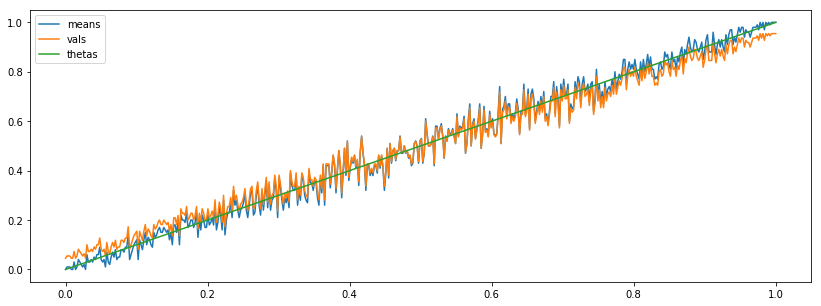

theta~ win =  0.402


In [528]:
means = []
vals = []
thetas = np.linspace(0, 1, 500)
for theta in thetas:
    X = sps.bernoulli(p=theta).rvs(size=100)
    mean = X.mean()
    val = mean + 1./(1 + math.sqrt(X.size))*(0.5 - mean)
    means.append(mean)
    vals.append(val)
    
# print(len(means))
plt.figure(figsize=(14,5))
plt.plot(thetas, means, label="means")
plt.plot(thetas, vals, label="vals")
plt.plot(thetas, thetas, label="thetas")
plt.legend()
plt.show()


meanserrors = np.abs(means - thetas)
valserrors = np.abs(vals - thetas)
wins = valserrors <= meanserrors
print("theta~ win = ", wins.mean())

<Возможно, если его бы за эти последние две недели не случились бы все возможные делайны - здесь было бы исследование, но тут только конец. А интересно было бы успеть. 23:47>